## SALES ANALYSIS

`Import Libraries`

In [1]:
import pandas as pd
import os

`Task 1 - merge the 12 months of data into a single csv file`

In [4]:
# READING A FILE OF DATA
df = pd.read_csv("./sales_data/Sales_April_2019.csv")

# CONCATENATING FILES
# -- storing file names from a directory in a list
files = [file for file in os.listdir('./sales_data')]

# -- create an empty dataframe
all_months_data = pd.DataFrame()

# -- a for loop to concatenate all 12 files into a new file
for file in files:
    df = pd.read_csv('./sales_data/'+file)
    # all_months_data = all_months_data.append(df) -- another way to concat
    all_months_data = pd.concat([all_months_data, df])

# -- saving the dataframe into new csv file
all_months_data.to_csv("all_data.csv", index=False)

In [5]:
# -- read updated dataframe
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


`Clean up data`

In [9]:
# DROP NAN ROWS
# -- add rows with nan into new df
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

# -- drop the rows from the all data df
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4/
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4/
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4/
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [13]:
# remove '/4' from data -- error displayed when adding a month column
all_data = all_data[all_data['Order Date'].str[0:2] != '4/']

In [14]:
# remove '/5' from data -- error displayed when adding a month column
all_data = all_data[all_data['Order Date'].str[0:2] != '5/']

In [7]:
# remove 'Or' from data -- error displayed when adding a month column
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [12]:
# remove '/4' entirely from the data
all_data.drop(all_data[(all_data['Order Date'].str[0:2] == '4/')].index, inplace=True)

In [14]:
# remove '/5' entirely from the data
all_data.drop(all_data[(all_data['Order Date'].str[0:2] == '5/')].index, inplace=True)

`Task 2 - add a month column`

In [17]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4
8,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4
10,176567,Google Phone,1,600,04/18/19 17:18,"444 7th St, Los Angeles, CA 90001",4


`Task 3 - add a sales column`

In [18]:
# -- convert columns to the correct type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [23]:
# -- create a new column and inserting values by multiplying 2 data
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
2,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95
3,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00
4,176567,Google Phone,1,600.00,04/18/19 17:18,"444 7th St, Los Angeles, CA 90001",4,600.00


In [22]:
# -- reset index values
all_data.reset_index(drop=True, inplace=True)

In [21]:
# -- view data after resetting index values
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
2,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95
3,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00
4,176567,Google Phone,1,600.00,04/18/19 17:18,"444 7th St, Los Angeles, CA 90001",4,600.00


`Question 1 - what was the best month for sales? how much was earned that month?`

In [37]:
# -- display month with most sales using groupby
results = all_data.groupby('Month').sum()['Sales']
results

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     2071078.04
5     3142047.46
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

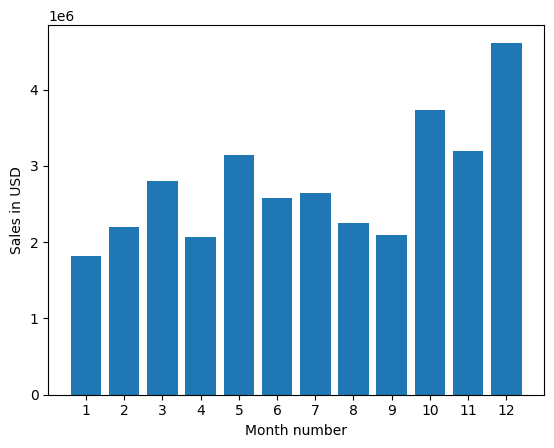

In [39]:
# VISUALIZING DATA USING THE MATPLOTLIB MODULE
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results)
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')

plt.show()

`Question 2 - what city has the highest sales/sold most products?`

In [ ]:
#